1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues:
 [ 2.69159316e+01 -3.14479432e-16  2.04910003e+00] 
 [2.70868786e+01 2.06063771e+00 1.46306757e-31]

Eigenvectors:
 [[-0.11063092 -0.81649658  0.56665169]
 [-0.58337283 -0.40824829 -0.70214633]
 [-0.80463466  0.40824829  0.43115704]] 
 [[-0.10962196  0.56684774 -0.81649658]
 [-0.5846219  -0.70110667 -0.40824829]
 [-0.80386582  0.43258881  0.40824829]]

By selecting the components 0 and 1, we retain 100.00% of the total variability
By selecting the component 0, we retain 92.93% of the total variability 
We can keep the 2 main components

Index of the eigenvalue to be removed 1


Text(0.5, 1.0, 'New basis x1-x3')

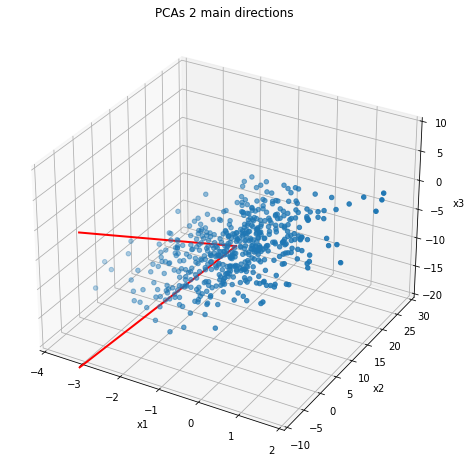

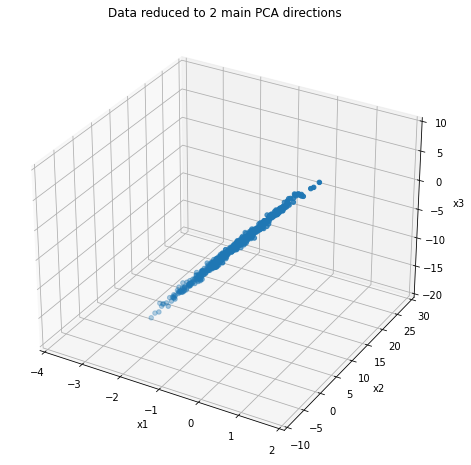

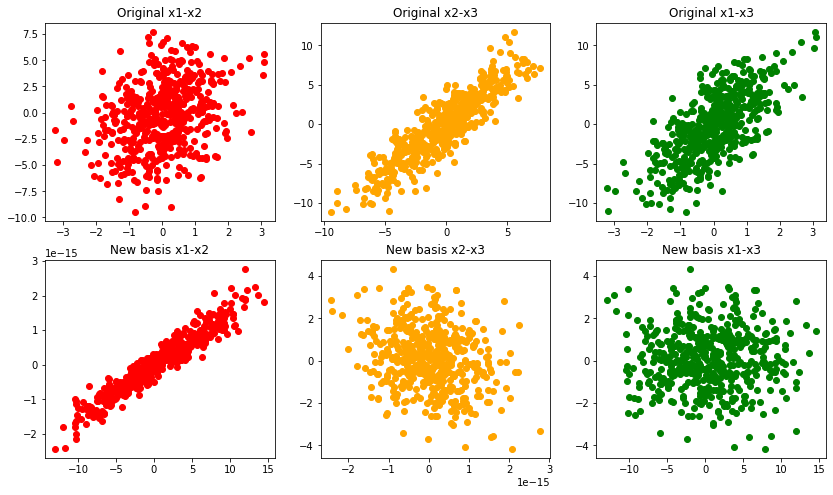

In [7]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

# Build the dataset
n = 500
x1 = np.random.normal(0, 1 , n)
x2 = x1 + np.random.normal(0, 3 , n)
x3 = 2*x1 + x2
x = np.vstack([x1,x2,x3])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-4, 2)
ax.set_ylim(-10, 30)
ax.set_zlim(-20, 10)
ax.scatter(x1, x2, x3, marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix 
cov = np.cov(x)
l, V = la.eig(cov)
l = np.real_if_close(l)

# Find the eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(x)
l_svd = S**2/(n-1)
V_svd = U

# Check that the two procedures yield to same result
print("Eigenvalues:\n", l, "\n", l_svd)
print("\nEigenvectors:\n", V, "\n", V_svd)

# Plot the result of PCA with 2 main directions
scale_factor = 3
l_main=l_svd[:-1]
V_main=V_svd[:-1]
for li, vi in zip(l_main, V_main):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
plt.title("PCAs 2 main directions")

# Compute the explained variance and reduce dimensionality 
print("\nBy selecting the components 0 and 1, we retain %.2f%% of the total variability" % (np.sum(l_svd[:-1])*100/np.sum(l_svd)))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (np.sum(l_svd[0])*100/np.sum(l_svd)), "\nWe can keep the 2 main components")
         
Xp = np.dot(V.T, x)                                       # redefine the data according to the PCA basis
idx = np.argmin(l)
print(f"\nIndex of the eigenvalue to be removed {idx}")
l[idx] = 0                                                # remove the last principal component
x_reduced = V.dot(np.diag(l).dot(Xp))/np.sum(l)           # in original coorindate with dimension reduction

fig = plt.figure(figsize=(10,8))               # plot the reduced data in the original basis (not required)
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-4, 2)
ax.set_ylim(-10, 30)
ax.set_zlim(-20, 10)
ax.scatter(x_reduced[0], x_reduced[1], x_reduced[2], marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Data reduced to 2 main PCA directions')


#Plot the original data in the original and PCA basis
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

axs[0, 0].scatter(x[0], x[1],  c='red')
axs[0, 0].set_title('Original x1-x2')
axs[0, 1].scatter(x[1], x[2], c='orange')
axs[0, 1].set_title('Original x2-x3')
axs[0, 2].scatter(x[0], x[2], c='green')
axs[0, 2].set_title('Original x1-x3')
axs[1, 0].scatter(Xp[0], Xp[1], c='red')
axs[1, 0].set_title('New basis x1-x2')
axs[1, 1].scatter(Xp[1], Xp[2], c='orange')
axs[1, 1].set_title('New basis x2-x3')
axs[1, 2].scatter(Xp[0], Xp[2], c='green')
axs[1, 2].set_title('New basis x1-x3')

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [96]:
# Add 10 noisy variables
noise_vars = list(range(10))
for i in range(10):
    noise_vars[i] = np.random.normal(0, 1/20 , n)

x = np.vstack([x, noise_vars])


# PCA
cov = np.cov(x)
l, V = la.eig(cov)
l = np.real_if_close(l)

# Reducing dimensionality of the system
print("\nBy selecting the components 0 and 1, we retain %.2f%% of the total variability" % (np.sum(l[:-1])*100/np.sum(l)))
print("By selecting the component 0, we retain %.2f%% of the total variability" % (np.sum(l[0])*100/np.sum(l)))

print("\nThe result by keeping only the first PCA component is a little worse then in the previous case.")
print("This can be caused by the added noise which makes the second component more relevant for describing the dataset.")


By selecting the components 0 and 1, we retain 100.00% of the total variability
By selecting the component 0, we retain 93.83% of the total variability

The result by keeping only the first PCA component is a little worse then in the previous case.
This can be caused by the added noise which makes the second component more relevant for describing the dataset.


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [13]:
import pandas as pd
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

data =  pd.read_csv('data/magic04.data', sep=",", header=None)
data = data.values.T[:-1].astype(float)
cov = np.cov(data)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues: ",[int(x) for x in l])

# Choose a number of dimension to keep at least 85% of the data variance information
cumsum = l.cumsum()
var_represented = cumsum/np.sum(l)
print("\nVariance represented by keeping first n dimensions in %:")
for i, v in enumerate(var_represented):
    print(i+1, " -> ", v*100,"%")
k = np.argmax(var_represented>0.85)
print("\nNumber of principal components to keep = ", k)

# Remove the last n-k principal components
l[k::] = 0                                                
print("\nReduced eigenvalues:", [int(x) for x in l])
Xp = np.dot(V.T, data) 
x_reduced = V.dot(np.diag(l).dot(Xp))/np.sum(l)  

Eigenvalues:  [6579, 3853, 2016, 1326, 610, 433, 117, 0, 0, 0]

Variance represented by keeping first n dimensions in %:
1  ->  44.0472831564329 %
2  ->  69.84635702474034 %
3  ->  83.34468747519854 %
4  ->  92.22645221247787 %
5  ->  96.31124599383492 %
6  ->  99.21390115548266 %
7  ->  99.99934718055896 %
8  ->  99.9999255476364 %
9  ->  99.99999742052232 %
10  ->  100.0 %

Number of principal components to keep =  2

Reduced eigenvalues: [6579, 3853, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0.5, 0.92, 'Data reduced to 3 main PCA directions')

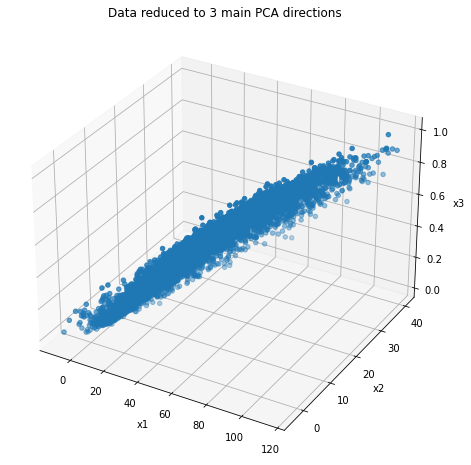

In [19]:
# Plot the reduced data in the original basis for k=3 (83% of original variance)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_reduced[0], x_reduced[1], x_reduced[2], marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Data reduced to 3 main PCA directions')